# News Classification

In [224]:
import numpy as np
import pandas as pd
dataframe = pd.read_csv('news_data.csv')
dataframe.info()

dataframe.groupby('category').describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200853 entries, 0 to 200852
Data columns (total 2 columns):
text        200853 non-null object
category    200853 non-null object
dtypes: object(2)
memory usage: 3.1+ MB


text         \
                count unique   
category                       
ARTS             1509   1509   
ARTS & CULTURE   1339   1338   
BLACK VOICES     4528   4525   
BUSINESS         5937   5935   
COLLEGE          1144   1144   
COMEDY           5175   5165   
CRIME            3405   3401   
CULTURE & ARTS   1030   1029   
DIVORCE          3426   3423   
EDUCATION        1004   1004   
ENTERTAINMENT   16058  16054   
ENVIRONMENT      1323   1322   
FIFTY            1401   1401   
FOOD & DRINK     6226   6226   
GOOD NEWS        1398   1398   
GREEN            2622   2617   
HEALTHY LIVING   6694   6689   
HOME & LIVING    4195   4163   
IMPACT           3459   3458   
LATINO VOICES    1129   1129   
MEDIA            2815   2813   
MONEY            1707   1707   
PARENTING        8677   8649   
PARENTS          3955   3897   
POLITICS        32739  32722   
QUEER VOICES     6314   6311   
RELIGION         2556   2549   
SCIENCE          2178   2178   
SPORTS           4884   4884   
STYLE            2254   2247   
STYLE & BEAUTY   9649   9516   
TASTE            2096   2096   
TECH             2082   2033   
TRAVEL           9887   9884   
WEDDINGS         3651   3651   
WEIRD NEWS       2670   2670   
WELLNESS        17827  17822   
WOMEN            3490   3405   
WORLD NEWS       2177   2176   
WORLDPOST        6243   6243   

                                                                        
                                                              top freq  
category                                                                
ARTS            The Venice Architecture Biennale of 2014. Rem ...    1  
ARTS & CULTURE  This New York Activist Wants To Replace A Stat...    2  
BLACK VOICES    'Black Love' Wedding Announcements (PHOTOS). "...    4  
BUSINESS        10 Most Hated Companies In America. To be trul...    2  
COLLEGE         The Two College Strategy Reduces the Benefits ...    1  
COMEDY                Saturday's Morning Email: Funnies Edition.     5  
CRIME                              Ferguson Police Officer Shot.     2  
CULTURE & ARTS  Sanjay Theodore on the ImageBlog. All photogra...    2  
DIVORCE         What I Wish People Learned About Marriage and ...    2  
EDUCATION       How We Talk About Race. People who insist that...    1  
ENTERTAINMENT   With This 'Shape Of Water' Clip, You'll Fall F...    2  
ENVIRONMENT     10 Cities That Could Run Out Of Water - Weathe...    2  
FIFTY           What Aging Women Want Most That Money Can't Bu...    1  
FOOD & DRINK    Knish Recipes: Potato, Beef, Spinach And Beyon...    1  
GOOD NEWS       Shelter Fakes Dog's Death To Free Her From Abu...    1  
GREEN           Take A Look At The Best Animal Photos Of The W...    3  
HEALTHY LIVING            Days of Inspiration for the New Year!.     5  
HOME & LIVING   Weekly Roundup of eBay Vintage Home Finds (PHO...    6  
IMPACT          Veterans for Hire: How Companies Can Help Them...    2  
LATINO VOICES   Selenis Leyva: Latinas Are Still, Unfortunatel...    1  
MEDIA           From Layoffs To Sexual Assault Allegations, It...    2  
MONEY           CoupRecoup, DealsGoRound: Have Daily Deal Remo...    1  
PARENTING       Best Parenting Tweets: What Moms And Dads Said...   26  
PARENTS         Funniest Parenting Tweets: What Moms And Dads ...   23  
POLITICS        Should We Give Cops 'Benefit of the Doubt' Whe...    2  
QUEER VOICES    Here's What Happens When Kids Age Out Of Foste...    2  
RELIGION        This Week In Pictures: Faith In Practice Aroun...    8  
SCIENCE         Bigfoot Versions Differ Across Cultures, But R...    1  
SPORTS          Michael Jordan Suggests To Kobe That He Try An...    1  
STYLE             Weekly Roundup of eBay Vintage Clothing Finds.     4  
STYLE & BEAUTY  Fashionably Late Style Quiz: Test Your Knowled...   17  
TASTE           Pepsi Is Adding Aspartame Back Into Its Diet D...    1  
TECH            Watch The Top 9 YouTube Videos Of The Week. If...   46  
TRAVEL      

In [226]:
X = dataframe['text']
y = dataframe['category']

POLITICS          32739
HOME & LIVING     28716
ENTERTAINMENT     16058
PARENTING         12632
STYLE & BEAUTY    11903
TRAVEL             9887
WORLD NEWS         8420
FOOD & DRINK       8322
QUEER VOICES       6314
BUSINESS           5937
COMEDY             5175
SPORTS             4884
BLACK VOICES       4528
ENVIRONMENT        3945
ARTS & CULTURE     3878
WEDDINGS           3651
WOMEN              3490
IMPACT             3459
DIVORCE            3426
CRIME              3405
MEDIA              2815
WEIRD NEWS         2670
RELIGION           2556
SCIENCE            2178
EDUCATION          2148
TECH               2082
MONEY              1707
FIFTY              1401
GOOD NEWS          1398
LATINO VOICES      1129
Name: category, dtype: int64


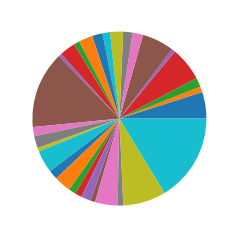

In [228]:
%matplotlib inline
import matplotlib.pyplot as plt
from preprocess import removeDuplicateLabels

y = removeDuplicateLabels(y)
print(y.value_counts())

labels = list(set(y))

counts = []
for label in labels:
    counts.append(np.count_nonzero(y == label))
plt.pie(counts)
plt.show()

In [232]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
y = labelencoder.fit_transform(y)

In [320]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

print(X_train.shape)
print(X_test.shape)

(160682,)
(40171,)


In [321]:
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.stem.porter import PorterStemmer

class StemmedTfidfVectorizer(TfidfVectorizer):
    def build_analyzer(self):
        stemmer = PorterStemmer()
        analyzer = super(StemmedTfidfVectorizer, self).build_analyzer()
        return lambda text: ([stemmer.stem(w) for w in analyzer(text)])

In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

vect  = StemmedTfidfVectorizer(analyzer='word', token_pattern=r'[a-zA-Z]{2,}', strip_accents='unicode', stop_words='english', ngram_range=(1,2), max_features=50000)
X_train = vect.fit_transform(X_train)
X_test = vect.transform(X_test)

In [319]:
features = vect.get_feature_names()
features.sort()
print(features[:10000])

['TM', 'a', 'aa', 'aa announc', 'aa bankruptci', 'aa chanc', 'aa discov', 'aa hello', 'aa meet', 'aa seat', 'aa sponse', 'aaa', 'aaa diamond', 'aaa estim', 'aaa found', 'aaa memb', 'aaa want', 'aaaaaaaaaaaaaaahhhhhh', 'aaaaaah', 'aaaaaah horrifi', 'aaaargh', 'aaand', 'aaand cu', 'aaas non', 'aafa', 'aafa sit', 'aah', 'aah mean', 'aahing bunch', 'aahs eat', 'aai', 'aai releas', 'aaliyah', 'aaliyah biop', 'aaliyah lifetim', 'aaliyah throwback', 'aaliyah yesterday', 'aam', 'aamer', 'aamer treat', 'aames look', 'aaml', 'aaml perc', 'aan', 'aan ze', 'aanav', 'aanav jayakar', 'aap', 'aap endors', 'aap guidelin', 'aap issu', 'aap revis', 'aap say', 'aap sponsorship', 'aap weigh', 'aapi', 'aapi assum', 'aapi commun', 'aapi resili', 'aapis hav', 'aapis high', 'aapl', 'aapl blockbust', 'aapl plan', 'aaps want', 'aardvark', 'aardvark born', 'aarhu', 'aarhus univers', 'aaron', 'aaron accomplish', 'aaron alexi', 'aaron allan', 'aaron almendr', 'aaron austin', 'aaron bennett', 'aaron betski', 'aaron

In [314]:
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from xgboost import XGBClassifier

classifier = MultinomialNB()

In [315]:
classifier.fit(X_train, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [316]:
pred = classifier.predict(X_test)

In [317]:
from sklearn.metrics import classification_report

print(classification_report(y_test, pred, target_names=labelencoder.classes_))

                precision    recall  f1-score   support

ARTS & CULTURE       1.00      0.01      0.02       773
  BLACK VOICES       0.90      0.01      0.02       861
      BUSINESS       0.82      0.01      0.02      1203
        COMEDY       0.88      0.02      0.04      1073
         CRIME       1.00      0.01      0.02       694
       DIVORCE       0.94      0.07      0.14       675
     EDUCATION       1.00      0.00      0.01       429
 ENTERTAINMENT       0.59      0.58      0.58      3224
   ENVIRONMENT       1.00      0.02      0.03       804
         FIFTY       0.00      0.00      0.00       291
  FOOD & DRINK       0.92      0.31      0.46      1681
     GOOD NEWS       0.00      0.00      0.00       296
 HOME & LIVING       0.32      0.94      0.48      5728
        IMPACT       0.00      0.00      0.00       703
 LATINO VOICES       0.00      0.00      0.00       208
         MEDIA       1.00      0.00      0.00       551
         MONEY       0.00      0.00      0.00  

/home/sourish/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
